<a href="https://colab.research.google.com/github/DevendraChoudhary15/thermofluids/blob/main/psychrometric_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a code to recreate the psychrometric chart by plotting constant a) specific volume lines, b) relative humidity lines and c) specific enthalpy lines with dry bulb temperature varying between 5◦C and 50◦C and specific humidity varying between 0 and 0.03 Kg/Kg dry air. The constant lines for the above mentioned properties should be drawn at the following values 
(a) 0.80, 0.85, 0.90 and 0.95 m3/Kg dry air 
(b) 10% to 100% at intervals of 10 percent 
(c) corresponding to WBT varying from 5◦C to 30◦C at intervals of 5 degrees 


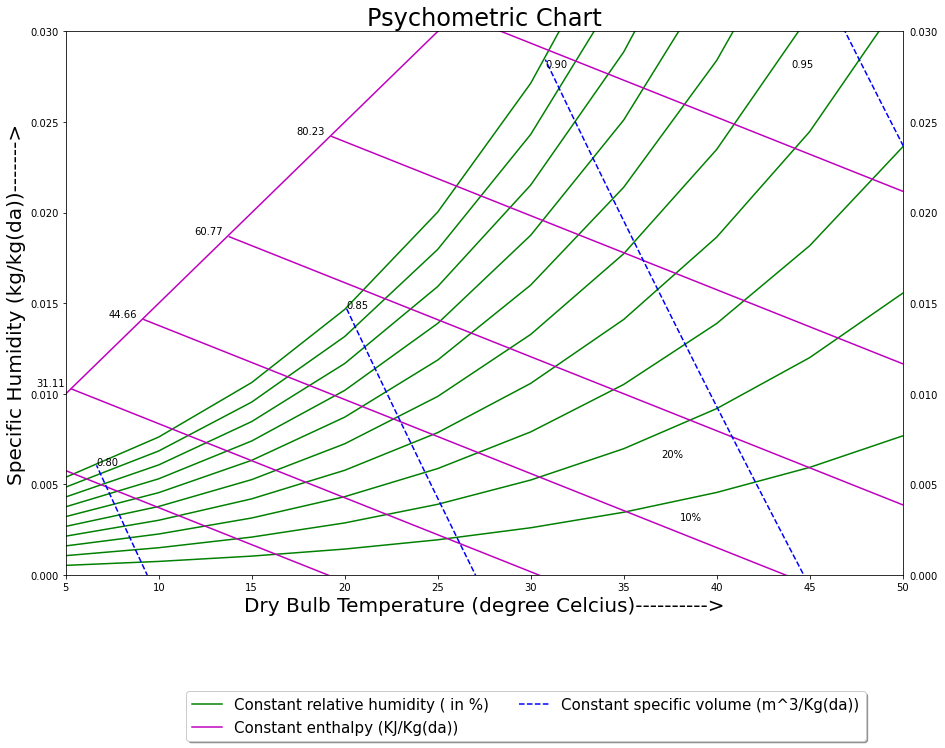

In [11]:


#importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import math as mt

#Given

P=101325  #Atmospheric pressure in Pa 
Ra=287.058 # Gas constant for air in J/Kg*K
p=101.325 #Atmospheric pressure in KPa
specific_volume= [.8,.85,.9,.95]


#phi,given
rel_humidity=[]
for i in range(10,110,10):
  rel_humidity.append(i/100)

#given
DBT= []
for j in range(5,51,5):
  DBT.append(j)


x=[] #DBT
y=[]  # w corresponding to DBT

#function to give the saturation pressure(Pa) at a given temperature(degree C)
def p_s(t):
    return 1000*(0.61094*(mt.exp(  (17.625*(t))/(t+243.04))))
   
#Plotting constant relative humidity lines
f=1
plt.figure(figsize=(15, 10))
for i in range(0,len(rel_humidity)):
    phi=rel_humidity[i]
    for j in range(0,len(DBT)):
        #w=0.622*(pv/ps)  , pv=phi*ps,  eliminating pv
        w=.622/( (P/(p_s(DBT[j])*phi)) -1)
        x.append(DBT[j])
        y.append(w)
    if f==1:
        plt.plot(x,y,color='green', label='Constant relative humidity ( in %)')
        f=0
    else:
        plt.plot(x,y,color='green')
    x.clear()
    y.clear()
    
#plotting the line w=(t+5)/1000 which acts as a bound to constant enthalpy lines
#W in KJ/Kgda and t in degree C
DBT2=[]
for i in range(50,520,1):
  DBT2.append(i/10)
for i in range (0,len(DBT2)):
    w=(DBT2[i]+5)/1000
    x.append(DBT2[i])
    y.append(w)
plt.plot(x,y,color='m')

x.clear()
y.clear()
f=1

#plotting constant enthaply(KJ/Kg(da)) lines
h1=[]
temp=np.arange(start=5, stop=35, step=5)
for i in range(0,len(temp)):
    w=.622/( (P/p_s(temp[i])) -1)
    enth=(1.206*(DBT[i])+2500*w)
    h1.append(enth)
h1=np.array(h1)



x.clear()
y.clear()
for i in range(0,len(h1)):
    hh=h1[i]
    for j in range(0,len(DBT2)):
        jj=len(DBT2)-1-j
        w=(hh-1.0216*DBT2[jj])/2500
        if(w*1000<=5+DBT2[jj]):
            x.append(DBT2[jj])
            y.append(w)
        elif w<.025:
            plt.text(DBT2[jj]-1.8,w+.0001,'%.2f'%hh)
            break
    if f==1:
        plt.plot(x,y,color='m', linestyle='-', label='Constant enthalpy (KJ/Kg(da))')
        f=0
    else: 
        plt.plot(x,y,color='m', linestyle='-')
    x.clear()
    y.clear()

plt.text(38,.003,'10%')
plt.text(37,.0065,'20%')
f=1


#plotting constant specific volume(m^3/Kg(da))

DBT2=[]
for i in range(5000,52000,1):
  DBT2.append(i/1000)
for i in range(0, len(specific_volume)):
    v=specific_volume[i]
    phi=1
    for j in range(0,len(DBT2)):
        jj=len(DBT2)-j-1
        t=DBT2[jj]+273
        w=.622 *((P*v)/(Ra*t)-1)
        if P-Ra*t/v <p_s(t-273):
            x.append(DBT2[jj])
            y.append(w)
        else:
            w1=min(.622/( (P/(p_s(DBT2[jj])*phi)) -1), .028)
            if v!=.95:
                plt.text(DBT2[jj],w1,'%.2f'%v)
            else:
                plt.text(44,w1,'%.2f'%v)
            break
    if f==1:
        plt.plot(x,y,color='blue', linestyle='--', label='Constant specific volume (m^3/Kg(da))')
        f=0
    else:
        plt.plot(x,y,color='blue', linestyle='--')
    x.clear()
    y.clear()

#Defining the plot parameters

plt.xlim(5, 50)
plt.ylim(0, .03)
plt.title('Psychometric Chart',fontsize=24)
plt.tick_params(axis='y',which='both',labelleft=1, labelright=1) 
plt.xlabel('Dry Bulb Temperature (degree Celcius)---------->',fontsize=20)
plt.ylabel('Specific Humidity (kg/kg(da))------->',fontsize=20)

plt.legend(loc='upper center',bbox_to_anchor=(0.55,-0.2),shadow='True',ncol=2,fontsize=15)
plt.show()






